# Define Questions & Goals:

## Goals

Mencari solusi dan inovasi yang akan direkomendasikan kepada suatu perusahaan reservasi penginapan. Buat rekomendasi bisnis beserta step by step pengolahan data mulai dari data cleaning, deep analytics, menentukan feature engineering, membangun machine learning dan melakukan evaluasi.

Perusahaan reservasi penginapan memiliki beberapa tantangan, seperti meningkatkan tingkat reservasi, mengoptimalkan harga berdasarkan permintaan, dan meningkatkan pengalaman pelanggan. Tujuan utama adalah meningkatkan profitabilitas dan kepuasan pelanggan.



## Questions

1. Bagaimana Distribusi lead time (waktu antara pemesanan dan kedatangan)?
2. Apakah ada pola tren atau musiman dalam jumlah reservasi sepanjang tahun?
3. Apa jenis pelanggan yang paling sering melakukan reservasi?
4. Jenis Deposit apa yang menghasilkan keberhasilan reservasi?
5. Top 5 country yang tingkat keberhasilan reservasinya tertinggi?
6. Apakah terdapat korelasi antara lead time dan jumlah permintaan kamar?
7. Jenis meal apa yang menjadi favorit pelanggan?
8. Market segment mana yang memiliki tingkat keberhasilan reservasi tertinggi
9. Bagaimanan reservasi atau penjualan dilakukan?
10. Berapa Persentase Pelanggan yang termasuk *Repeated Guest*
12. Berapa banyak pelanggan yang tidak mendapatkan tipe kamar yang sesuai?
13. RFM Analysis

# Gathering Data

Dataset yang digunakan diperoleh dari link GDrive berikut:
https://bit.ly/DatasetChallengeDS

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Menampilkan semua kolom pada dataset
pd.set_option('display.max_columns', 100)

In [ ]:
# load dataset test
df = pd.read_excel("test.xlsx")
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297


# Assessing Data

Assessing Data adalah proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

In [ ]:
# cek informasi setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           35698 non-null  object        
 1   lead_time                       35698 non-null  int64         
 2   arrival_date_year               35698 non-null  int64         
 3   arrival_date_month              35698 non-null  object        
 4   arrival_date_week_number        35698 non-null  int64         
 5   arrival_date_day_of_month       35698 non-null  int64         
 6   stays_in_weekend_nights         35698 non-null  int64         
 7   stays_in_week_nights            35698 non-null  int64         
 8   adults                          35698 non-null  int64         
 9   children                        35697 non-null  float64       
 10  babies                          35698 non-null  int64         
 11  me

Berikut adalah penjelasan untuk setiap kolom pada dataset:

1. **hotel**: Nama hotel atau penginapan.
2. **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
3. **arrival_date_year**: Tahun kedatangan tamu.
4. **arrival_date_month**: Bulan kedatangan tamu.
5. **arrival_date_week_number**: Nomor minggu dalam tahun untuk tanggal kedatangan.
6. **arrival_date_day_of_month**: Hari kedatangan tamu dalam bulan.
7. **stays_in_weekend_nights**: Jumlah malam yang dihabiskan tamu di akhir pekan.
8. **stays_in_week_nights**: Jumlah malam yang dihabiskan tamu pada hari kerja.
9. **adults**: Jumlah tamu dewasa.
10. **children**: Jumlah anak-anak yang menyertai tamu.
11. **babies**: Jumlah bayi yang menyertai tamu.
12. **meal**: Tipe paket makanan yang dipilih oleh tamu (misalnya, BB untuk Bed & Breakfast).
13. **country**: Negara asal tamu.
14. **market_segment**: Segmen pasar melalui mana pemesanan dilakukan (misalnya, Online TA untuk Travel Agents online).
15. **distribution_channel**: Saluran distribusi pemesanan (misalnya, TA/TO untuk Travel Agents/Tour Operators).
16. **is_repeated_guest**: Menunjukkan apakah tamu merupakan pengunjung berulang atau tidak (0 untuk tidak, 1 untuk ya).
17. **previous_cancellations**: Jumlah pemesanan yang telah dibatalkan oleh tamu sebelumnya.
18. **previous_bookings_not_canceled**: Jumlah pemesanan yang tidak dibatalkan oleh tamu sebelumnya.
19. **reserved_room_type**: Tipe kamar yang telah dipesan oleh tamu.
20. **assigned_room_type**: Tipe kamar yang sebenarnya diberikan kepada tamu saat check-in.
21. **booking_changes**: Jumlah perubahan yang dilakukan pada pemesanan.
22. **deposit_type**: Jenis deposit yang telah dibayarkan oleh tamu (misalnya, No Deposit untuk tanpa deposit).
23. **agent**: ID agen perjalanan yang membuat pemesanan.
24. **company**: ID perusahaan yang membuat pemesanan.
25. **days_in_waiting_list**: Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi.
26. **customer_type**: Jenis tamu (misalnya, Transient untuk tamu individu).
27. **adr**: Average Daily Rate, rata-rata biaya kamar per malam.
28. **required_car_parking_spaces**: Jumlah tempat parkir yang dibutuhkan oleh tamu.
29. **total_of_special_requests**: Jumlah permintaan khusus oleh tamu.
30. **reservation_status**: Status pemesanan terakhir (misalnya, Check-Out untuk tamu yang sudah check-out).
31. **reservation_status_date**: Tanggal terakhir diupdate status pemesanan.
32. **bookingID**: ID unik untuk setiap pemesanan.

Jika diperhatikan, tipe data dari kolom **children**, **agent**, dan **company** seharusnya adalah **int**. Selain itu, terdapat perbedaan pada jumlah data pada kolom **children**, **country**, **agent**, **company**. Hal ini menunjukkan adanya missing values pada kolom-kolom tersebut.

In [ ]:
# cek missing value
df.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             142
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4925
company                           33636
days_in_waiting_list                  0


Informasi di atas menunjukkan terdapat **1** missing value pada kolom **children**, **142** pada kolom **country**, **4925** pada kolom **agent**, dan **33636** (**94%** dari keseluruhan data) pada kolom **company**.

Untuk **kolom company** akan **dihapus** karena jika sebagian besar data pada suatu kolom hilang, informasi yang tersedia tidak dapat dianggap sebagai representasi yang baik dari kolom tersebut.

Terkait hal itu dan kolom-kolom yang terdapat missing value lainnya akan ditangani pada tahap data cleaning nanti.

In [ ]:
# cek data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Data tidak memiliki baris yang duplikat

In [ ]:
# parameter statistik
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,35698.000000,35698.000000,35698.000000,35698.000000,35698.000000,35698.000000,35698.000000,35697.000000,35698.000000,35698.000000,35698.000000,35698.000000,35698.000000,30773.000000,2062.000000,35698.000000,35698.000000,35698.000000,35698.000000,35698.000000
mean,103.421760,2018.162782,27.229257,15.787607,0.925626,2.497115,1.859376,0.104939,0.007732,0.030982,0.082750,0.127654,0.218248,86.602314,187.626576,2.274553,102.435617,0.064373,0.573141,101141.500000
std,106.223079,0.708424,13.576197,8.782366,0.987463,1.876008,0.513811,0.398581,0.089175,0.173272,0.793733,1.364361,0.645603,110.646052,130.958624,17.155426,55.913035,0.246332,0.792002,10305.269291
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,83293.000000
25%,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,70.000000,0.000000,0.000000,92217.250000
50%,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,95.000000,0.000000,0.000000,101141.500000
75%,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,269.000000,0.000000,126.000000,0.000000,1.000000,110065.750000
max,709.000000,2019.000000,53.000000,31.000000,16.000000,41.000000,27.000000,3.000000,2.000000,1.000000,26.000000,72.000000,18.000000,535.000000,525.000000,391.000000,5400.000000,2.000000,5.000000,118990.000000


Hasil di atas menunjukkan bahwa tidak terdapat keanehan dalam ringkasan parameter statistik dari dataset.

# Data Cleaning

Pada tahap ini, akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data

## Menangani missing value

secara umum terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

### **Kolom children**

In [ ]:
# cek kolom children yang mengandung missing value
df[df.children.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
28866,"Louisville East Courtyard Louisville, KY",2,2017,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2017-08-01,112159


In [ ]:
# cek kolom children yang tidak mengandung missing value
df[~df.children.isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297


In [ ]:
# isi missing value dengan median
df['children'] = df.children.fillna(df.children.median())

Missing value pada **kolom children** tidak dihapus karena baris tersebut memiliki banyak informasi yang berguna untuk analsis nanti, daripada menghapus missing value tersebut maka dilakukan *imputation* dengan nilai **median**.

Mengisi missing value dengan median sering dianggap baik karena median memiliki beberapa karakteristik yang membuatnya menjadi pilihan yang stabil dan kurang dipengaruhi oleh nilai ekstrem (outliers) dibandingkan dengan mean (rata-rata).

### **Kolom country**

In [ ]:
# cek kolom country yang mengandung missing value
df[df.country.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
18,Sacramento Airport Natomas Courtyard Sacrament...,2,2017,November,45,4,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,6,A,D,1,No Deposit,NaN,204.0,0,Transient,35.0,0,1,Check-Out,2017-11-06,83311
155,Residence Inn Las Vegas Convention Center Las ...,0,2018,October,44,24,1,1,1,0.0,0,BB,NaN,Direct,Direct,0,0,1,A,A,0,No Deposit,NaN,NaN,0,Transient,61.0,1,1,Check-Out,2018-10-26,83448
317,"Frankfurt Marriott Hotel Frankfurt, Germany",0,2018,March,13,22,0,2,1,0.0,0,BB,NaN,Direct,Corporate,0,0,4,A,A,0,No Deposit,NaN,NaN,0,Transient,53.0,0,0,Check-Out,2018-03-24,83610
1119,"W London – Leicester Square London, United Kin...",0,2017,November,48,26,0,1,1,0.0,0,BB,NaN,Direct,Direct,0,0,1,A,E,0,No Deposit,NaN,NaN,0,Transient,38.0,0,0,Check-Out,2017-11-27,84412
1949,"W London – Leicester Square London, United Kin...",2,2019,January,4,25,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,2,A,D,0,No Deposit,NaN,94.0,0,Transient-Party,35.0,0,0,Check-Out,2019-01-27,85242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34454,"The St. Regis Osaka Osaka, Japan",0,2018,October,43,18,0,2,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,4,A,F,0,No Deposit,NaN,NaN,0,Transient,50.0,1,0,Check-Out,2018-10-20,117747
34720,"Chicago O'Hare Courtyard Des Plaines, IL",2,2018,November,46,9,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,22,A,C,0,No Deposit,NaN,204.0,0,Transient,35.0,0,2,Check-Out,2018-11-10,118013
34822,Marriott Puerto Vallarta Resort & Spa Puerto V...,7,2018,January,4,18,1,3,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,27.0,0,0,Check-Out,2018-01-22,118115
35438,"Orlando Airport Courtyard Orlando, FL",0,2018,March,12,14,1,0,2,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,45.0,0,0,Check-Out,2018-03-15,118731


In [ ]:
# cek kolom country yang tidak mengandung missing value
df[~df.country.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35693,"Waves, Barbados Barbados",59,2018,March,14,28,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,85.85,0,1,Check-Out,2018-04-01,118986
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0.0,0,SC,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Canceled,2019-04-19,118987
35695,"Orlando Airport Courtyard Orlando, FL",114,2018,July,27,1,1,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,192.0,NaN,0,Transient,75.00,0,0,Canceled,2018-03-29,118988
35696,"Leipzig Marriott Hotel Leipzig, Germany",0,2018,February,7,8,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,65.00,0,0,Check-Out,2018-02-09,118989


In [ ]:
# drop missing value pada kolom country
df = df.dropna(subset=['country'])

karena kolom contry mengandung hanya 142 (0.4%) missing value dari keseluruhan data dan jika dihapus tidak akan menimbulkan efek yang signifikan terhadap analisis data, maka missing value pada kolom country di-*drop*

### **Kolom agent**

In [ ]:
# cek kolom agent yang mengandung missing value
df[df.agent.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
7,Courtyard by Marriott Rio de Janeiro Barra da ...,229,2019,July,28,12,1,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,110.0,0,0,Canceled,2018-11-25,83300
14,Courtyard by Marriott Aberdeen Airport Aberdee...,257,2019,May,19,9,0,4,2,0.0,0,HB,GBR,Groups,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient-Party,91.0,0,0,Check-Out,2019-05-13,83307
19,"Des Moines West/Clive Courtyard Clive, IA",186,2019,July,28,15,4,6,3,0.0,0,HB,PRT,Direct,Direct,0,0,1,E,E,0,No Deposit,NaN,NaN,0,Transient,248.1,1,1,Check-Out,2019-07-25,83312
20,"Indianapolis Airport Courtyard Indianapolis, IN",26,2018,April,15,4,1,0,1,0.0,0,BB,POL,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,119.0,0,0,Check-Out,2018-04-05,83313
31,"Sheraton Diana Majestic, Milan Milan, Italy",128,2018,December,49,3,0,1,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,64.0,0,0,Canceled,2018-11-23,83324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35653,"Chicago O'Hare Courtyard Des Plaines, IL",3,2018,September,38,12,1,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,3,44,A,A,0,No Deposit,NaN,40.0,0,Transient,67.0,0,0,No-Show,2018-09-12,118946
35658,Marriott Puerto Vallarta Resort & Spa Puerto V...,5,2019,April,14,5,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,95.0,0,0,Check-Out,2019-04-07,118951
35679,"St. Louis Downtown West Courtyard St. Louis, MO",24,2018,August,36,29,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,40.0,0,Transient,67.0,1,1,Check-Out,2018-08-31,118972
35696,"Leipzig Marriott Hotel Leipzig, Germany",0,2018,February,7,8,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,65.0,0,0,Check-Out,2018-02-09,118989


In [ ]:
# cek kolom agent yang tidak mengandung missing value
df[~df.agent.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35691,"Tamarind, Barbados Barbados",163,2019,August,34,21,1,1,3,0.0,0,BB,POL,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,175.50,0,2,Check-Out,2019-08-23,118984
35692,"The St. Regis Osaka Osaka, Japan",122,2018,March,14,27,2,1,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,26.0,NaN,0,Transient-Party,107.00,0,1,Canceled,2018-03-27,118985
35693,"Waves, Barbados Barbados",59,2018,March,14,28,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,85.85,0,1,Check-Out,2018-04-01,118986
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0.0,0,SC,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Canceled,2019-04-19,118987


In [ ]:
# isi missing value dengan median
df['agent'] = df.agent.fillna(df.agent.median())

Missing value pada kolom **agent** tidak dihapus karena baris tersebut memiliki banyak informasi yang berguna untuk analsis nanti, daripada menghapus missing value tersebut maka dilakukan *imputation* dengan nilai **median**.

Mengisi missing value dengan median sering dianggap baik karena median memiliki beberapa karakteristik yang membuatnya menjadi pilihan yang stabil dan kurang dipengaruhi oleh nilai ekstrem (outliers) dibandingkan dengan mean (rata-rata).

### **Kolom company**

In [ ]:
# cek kolom company yang mengandung missing value
df[df.company.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35693,"Waves, Barbados Barbados",59,2018,March,14,28,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,85.85,0,1,Check-Out,2018-04-01,118986
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0.0,0,SC,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Canceled,2019-04-19,118987
35695,"Orlando Airport Courtyard Orlando, FL",114,2018,July,27,1,1,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,192.0,NaN,0,Transient,75.00,0,0,Canceled,2018-03-29,118988
35696,"Leipzig Marriott Hotel Leipzig, Germany",0,2018,February,7,8,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,14.0,NaN,0,Transient,65.00,0,0,Check-Out,2018-02-09,118989


In [ ]:
# cek kolom company yang tidak mengandung missing value
df[~df.company.isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
32,Residence Inn Rio de Janeiro Barra da Tijuca B...,7,2018,October,41,5,1,4,2,0.0,0,BB,GBR,Groups,Corporate,0,0,0,A,A,0,No Deposit,14.0,405.0,0,Transient-Party,50.0,0,1,Check-Out,2018-10-10,83325
104,"Treasure Beach, Barbados Barbados",68,2019,April,14,5,0,4,2,0.0,0,BB,DNK,Corporate,Corporate,0,0,0,A,A,2,No Deposit,14.0,418.0,0,Transient-Party,110.0,0,0,Check-Out,2019-04-09,83397
161,Sacramento Airport Natomas Courtyard Sacrament...,364,2018,October,42,12,0,4,1,0.0,0,BB,GBR,Groups,Corporate,0,0,0,A,A,1,No Deposit,14.0,223.0,0,Transient-Party,60.0,0,0,Check-Out,2018-10-16,83454
170,"Frankfurt Marriott Hotel Frankfurt, Germany",8,2019,April,14,6,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,14.0,511.0,0,Transient,45.0,0,0,Check-Out,2019-04-07,83463
172,"Renaissance Hamburg Hotel Hamburg, Germany",99,2018,February,8,19,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,1,0,A,A,0,No Deposit,14.0,67.0,0,Transient-Party,80.0,0,0,Canceled,2017-12-22,83465


In [ ]:
# drop kolom company
df = df.drop(columns=['company'])

kolom company di-*drop* karena mengandung lebih dari 50%, yaitu  33636 missing value atau 94% dari keseluruhan data.

Jika lebih dari setengah data dalam suatu kolom hilang, informasi yang dapat diambil dari kolom tersebut menjadi sangat tidak pasti.

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,126.00,0,1,Canceled,2019-01-02,83297


## Menangani Tipe data yang salah

In [ ]:
# cek tipe data
df.dtypes

hotel                                     object
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes     

In [ ]:
# Mengganti tipe data kolom 'children' dari float ke integer
df['children'] = df['children'].astype(int)

In [ ]:
# Mengganti tipe data kolom 'agent' dari float ke integer
df['agent'] = df['agent'].astype(int)

In [ ]:
import calendar

# Mengubah nama bulan menjadi urutan bulan
month_order = list(calendar.month_name[1:])
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Deep Analytics & Exploratory Data Analysis (EDA)

Tujuan: Memperoleh pemahaman umum tentang data dan Menyelesaikan masalah spesifik dengan mengekstraksi *insights* dari dataset besar

## Bagaimana Distribusi lead time (waktu antara pemesanan dan kedatangan)?

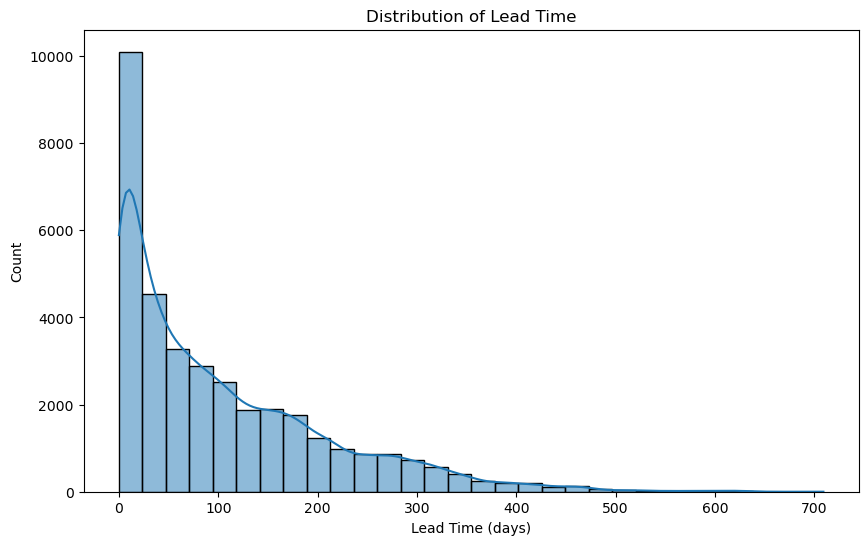

In [ ]:
# Distribusi Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.show()

Distribusi Lead Time berjenis **Positive Skew** (right-skewed dsitribution). Dalam konteks data lead_time pada reservasi penginapan, Positive Skewness dapat diartikan bahwa sebagian besar reservasi memiliki lead time yang relatif pendek, tetapi ada beberapa reservasi dengan lead time yang sangat panjang.

## Apakah ada pola tren atau musiman dalam jumlah reservasi sepanjang tahun?

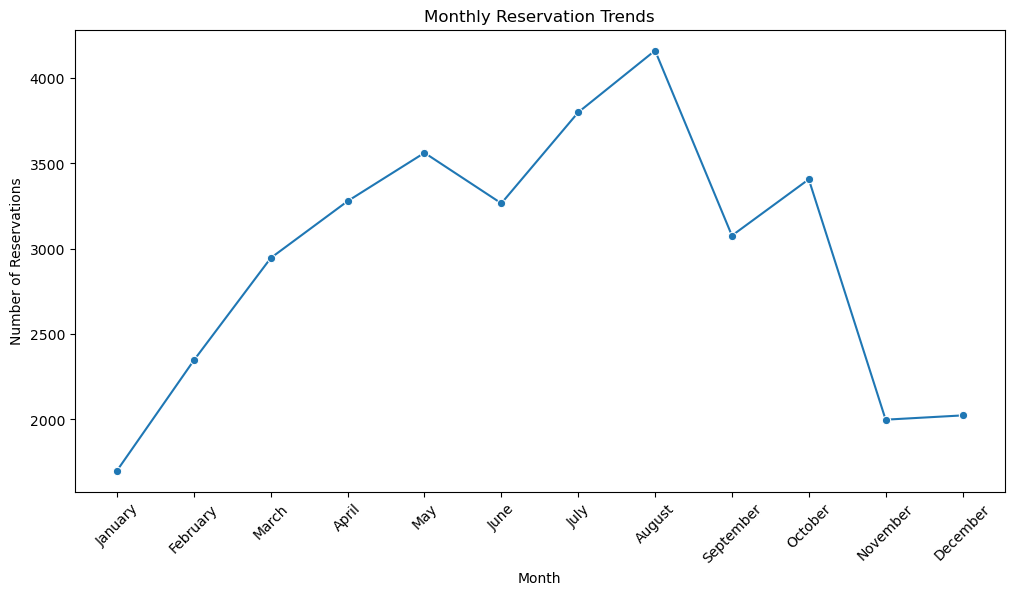

In [ ]:
# Menghitung jumlah reservasi per bulan
monthly_reservation = df.groupby('arrival_date_month')['bookingID'].count().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='bookingID', data=monthly_reservation, marker='o')
plt.title('Monthly Reservation Trends')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.show()

Berdasarkan *line plot* di atas, bulan Agustus memiliki jumlah reservasi terbanyak.

Ini mungkin dikarenakan bulan Agustus memiliki beberapa acara dan kejadian yang dapat menjadi faktor peningkatan jumlah reservasi hotel di Eropa. Beberapa kemungkinan penyebabnya antara lain:

1. **Liburan Musim Panas**: Agustus sering kali merupakan bulan liburan musim panas di banyak negara, terutama di Eropa. Banyak orang memanfaatkan waktu libur sekolah dan cuaca yang baik untuk berlibur, sehingga permintaan akomodasi, seperti hotel, meningkat.

2. **Festival dan Acara**: Banyak festival dan acara besar di Eropa yang diadakan selama bulan Agustus. Contohnya adalah Festival Edinburgh di Skotlandia, La Tomatina di Spanyol, dan Notting Hill Carnival di London. Acara-acara ini menarik wisatawan dari berbagai belahan dunia, sehingga permintaan akomodasi ikut meningkat.

3. **Cuaca Baik**: Bulan Agustus sering kali memiliki cuaca yang menyenangkan di Eropa, terutama di wilayah selatan. Cuaca yang hangat dan cerah dapat menjadi dorongan tambahan bagi orang-orang untuk bepergian dan menginap di hotel.

4. **Musim Liburan**: Banyak orang Eropa sendiri yang mengambil cuti pada bulan Agustus untuk berlibur, sehingga meningkatkan permintaan akomodasi.

## Apa jenis pelanggan yang paling sering melakukan reservasi?

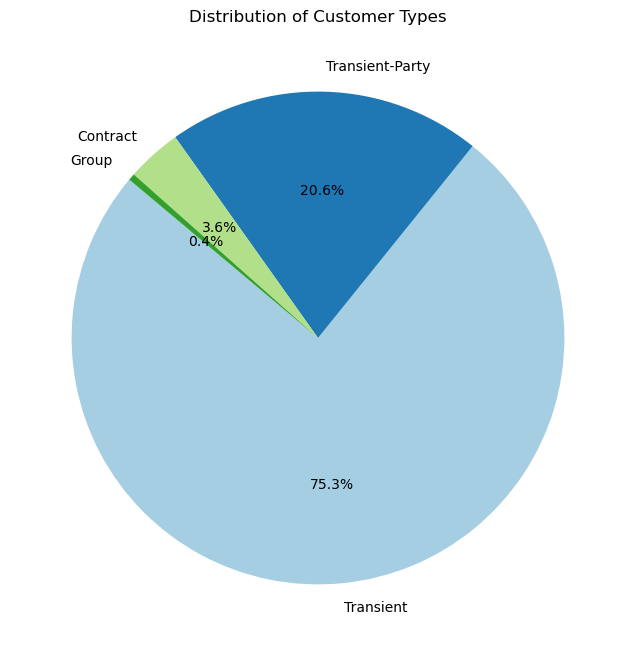

In [ ]:
# Visualisasi untuk kolom 'customer_type' (pie chart)
plt.figure(figsize=(8, 8))
customer_type_counts = df['customer_type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Customer Types')
plt.show()

Berdasarkan perolehan di atas, **Transient** adalah jenis pelanggan yang **paling sering** melakukan **reservasi**

Berikut adalah interpretasi dari setiap nilai pada kolom 'customer_type':

1. **Transient**:
Pelanggan jenis "Transient" adalah pelanggan reguler atau individu yang melakukan reservasi tanpa adanya kontrak atau perjanjian khusus. Mereka biasanya melakukan pemesanan secara langsung atau melalui agen perjalanan dan tidak terikat oleh perjanjian jangka panjang.

2. **Transient-Party**:
Pelanggan jenis "Transient-Party" adalah kelompok pelanggan reguler yang melakukan reservasi tanpa adanya kontrak khusus, tetapi dalam jumlah lebih dari satu orang. Mereka mungkin termasuk dalam kategori tamu yang melakukan perjalanan bersama atau kelompok kecil.

3. **Contract**:
Pelanggan jenis "Contract" adalah pelanggan yang melakukan reservasi berdasarkan kontrak atau perjanjian khusus dengan penginapan. Kontrak ini dapat mencakup kesepakatan jangka panjang atau fasilitas khusus yang diberikan kepada pelanggan kontrak.

4. **Group**:
Pelanggan jenis "Group" adalah kelompok pelanggan yang melakukan reservasi bersama dan biasanya dalam jumlah yang cukup besar. Reservasi ini mungkin terkait dengan perjalanan kelompok, pertemuan bisnis, atau kegiatan kelompok lainnya.

## Jenis Deposit apa yang menghasilkan keberhasilan reservasi?

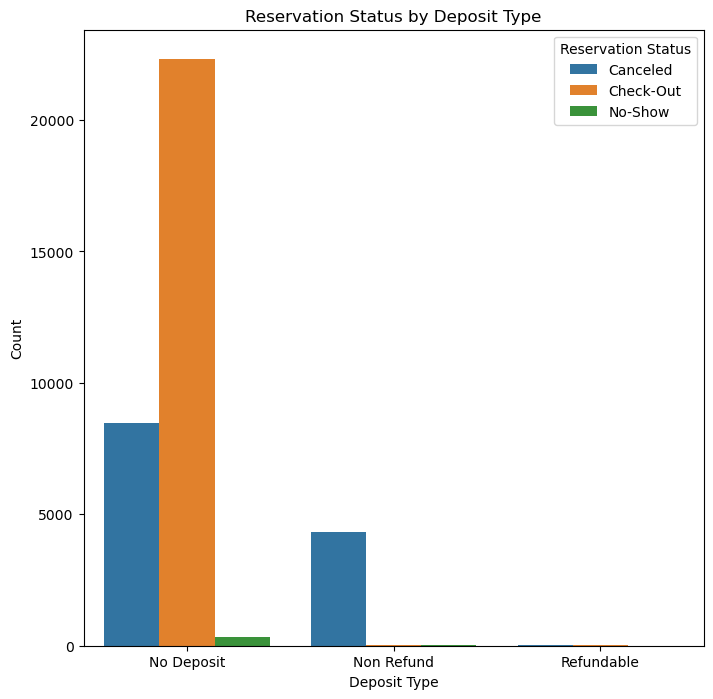

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='deposit_type', hue='reservation_status', data=df)
plt.title('Reservation Status by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.show()

Berdasarkan informasi di atas, Jenis deposit menggunakan **No Deposit** memiliki tingkat **keberhasilan reservasi (Check-Out) paling tinggi**.

## *Top 5 Country* yang tingkat keberhasilan reservasinya tertinggi?

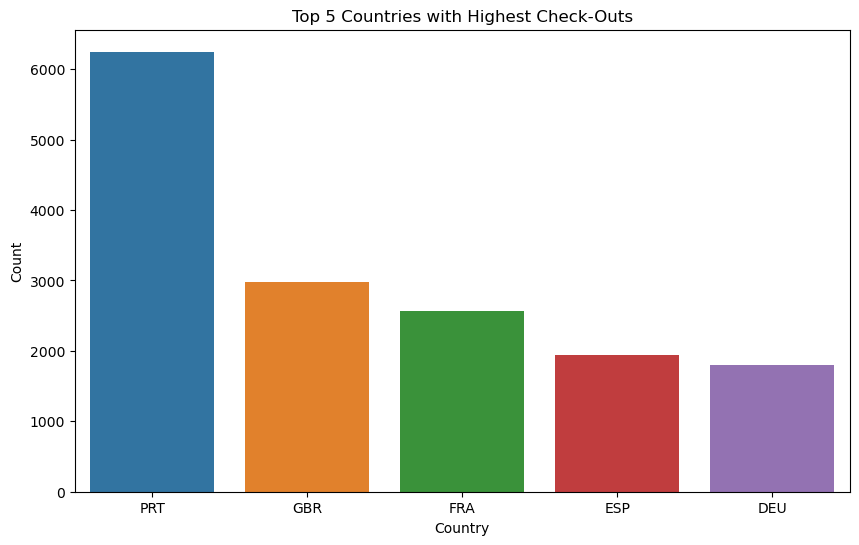

In [ ]:
top_countries = df[df['reservation_status'] == 'Check-Out']['country'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 5 Countries with Highest Check-Outs')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Berdasarkan standar ISO 3166-1 alpha-3, Top 5 Countries yang dimaksud adalah:

- **PRT**: Portugal
- **GBR**: United Kingdom (Inggris)
- **FRA**: France (Prancis)
- **ESP**: Spain (Spanyol)
- **DEU**: Germany (Jerman)

## Apakah terdapat korelasi antara lead time dan jumlah permintaan kamar?

In [ ]:
correlation_lead_time_booking_changes = df['lead_time'].corr(df['booking_changes'])
print(f'Korelasi antara lead time dan booking changes: {correlation_lead_time_booking_changes}')

Korelasi antara lead time dan booking changes: 0.0016468119509200215


**Tidak ada korelasi** antara lead time dan jumlah permintaan kamar, karena nilai **korelasinya sangat rendah**

## Jenis Meal Apa yang menjadi Favorit Pelanggan?

In [ ]:
df.meal.value_counts()

BB           27422
HB            4336
SC            3234
Undefined      339
FB             225
Name: meal, dtype: int64

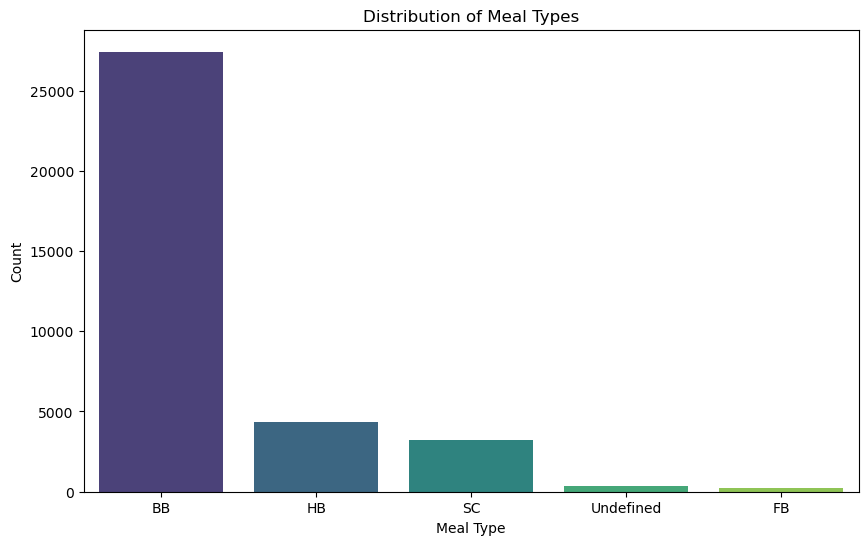

In [ ]:
# Visualisasi untuk kolom 'meal'
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', data=df, palette='viridis', order=df['meal'].value_counts().index)
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

Berdasarkan informasi yang diperoleh, meal **BB (Bed & Breakfast)** lah menjadi favorit pelanggan


Berikut adalah interpretasi dari setiap nilai pada kolom '**meal**':

1. **BB (Bed & Breakfast)**: Tamu hanya mendapatkan sarapan sebagai bagian dari paket. Makanan untuk waktu yang lain tidak termasuk.

2. **HB (Half Board)**: Tamu mendapatkan sarapan dan satu makan lainnya, biasanya makan malam. Makan siang tidak termasuk.

3. **SC (Self Catering)**: Tamu dapat memasak atau menyediakan makanan sendiri. Fasilitas dapur dapat disediakan, dan makanan tidak disertakan dalam paket.

4. **Undefined**: Ini mungkin merujuk pada situasi di mana informasi tentang paket makanan tidak jelas atau tidak diisi dengan benar dalam dataset. Variabel ini mungkin memerlukan pengecekan lebih lanjut atau pemrosesan data tambahan.

5. **FB (Full Board)**: Tamu mendapatkan semua makanan utama, termasuk sarapan, makan siang, dan makan malam. Snack atau jenis makanan tambahan mungkin juga termasuk.

## Market segment mana yang memiliki tingkat keberhasilan reservasi tertinggi

In [ ]:
df.market_segment.value_counts()

Online TA        16908
Offline TA/TO     7244
Groups            5790
Direct            3802
Corporate         1522
Complementary      214
Aviation            75
Undefined            1
Name: market_segment, dtype: int64

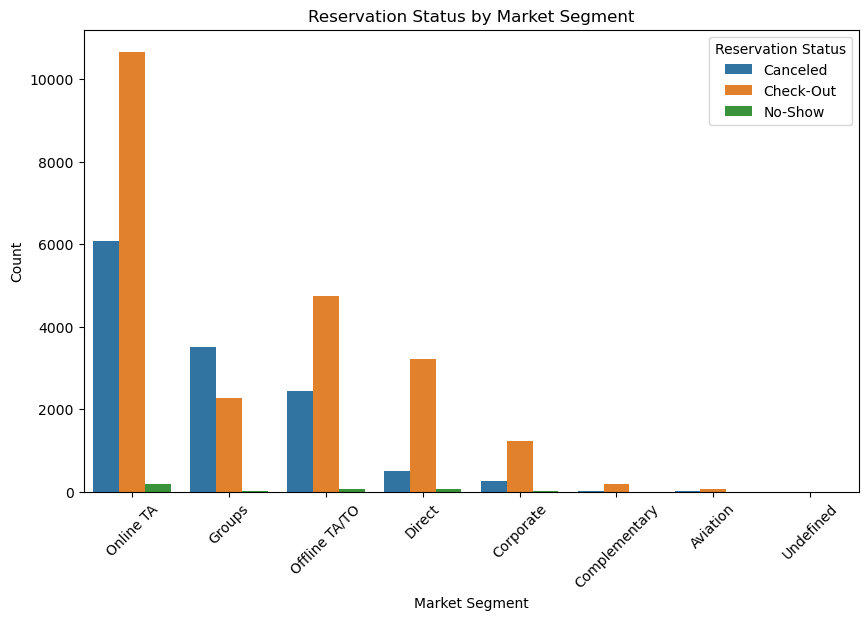

In [ ]:
# Menampilkan tingkat keberhasilan reservasi berdasarkan market segment
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='reservation_status', data=df)
plt.title('Reservation Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.xticks(rotation=45)
plt.show()

Berdasarkan informasi yang diperoleh, segment **Online TA** yang memiliki tingkat keberhasilan reservasi tertinggi.

Serta pada market segment **Groups** lebih banyak pelanggan meng-*cancel* daripada men-*check-out*

Nilai-nilai pada kolom '**market_segment**' mencerminkan segmen pasar atau sumber dari mana reservasi penginapan berasal.

1. **Online TA**: Merupakan singkatan dari Online Travel Agents. Reservasi ini berasal dari agen perjalanan online.

2. **Offline TA/TO**: Merupakan singkatan dari Offline Travel Agents or Tour Operators. Reservasi ini berasal dari agen perjalanan offline atau operator tur.

3. **Groups**: Reservasi ini berasal dari kelompok-kelompok pelanggan, mungkin dalam jumlah yang lebih besar, yang melakukan pemesanan bersama.

4. **Direct**: Reservasi ini berasal langsung dari tamu atau pelanggan tanpa melalui agen perjalanan atau pihak ketiga.

5. **Corporate**: Reservasi ini berasal dari perusahaan atau bisnis yang melakukan pemesanan untuk keperluan perjalanan bisnis.

6. **Complementary**: Reservasi ini bersifat komplementer atau disediakan sebagai bagian dari layanan tambahan atau promosi.

7. **Aviation**: Reservasi ini berasal dari industri penerbangan atau maskapai.

8. **Undefined**: Ini mungkin merujuk pada situasi di mana informasi tentang segmen pasar tidak jelas atau tidak diisi dengan benar dalam dataset.

## Bagaimana reservasi atau penjualan dilakukan?

In [ ]:
df.distribution_channel.value_counts()

TA/TO        29115
Direct        4404
Corporate     1976
GDS             60
Undefined        1
Name: distribution_channel, dtype: int64

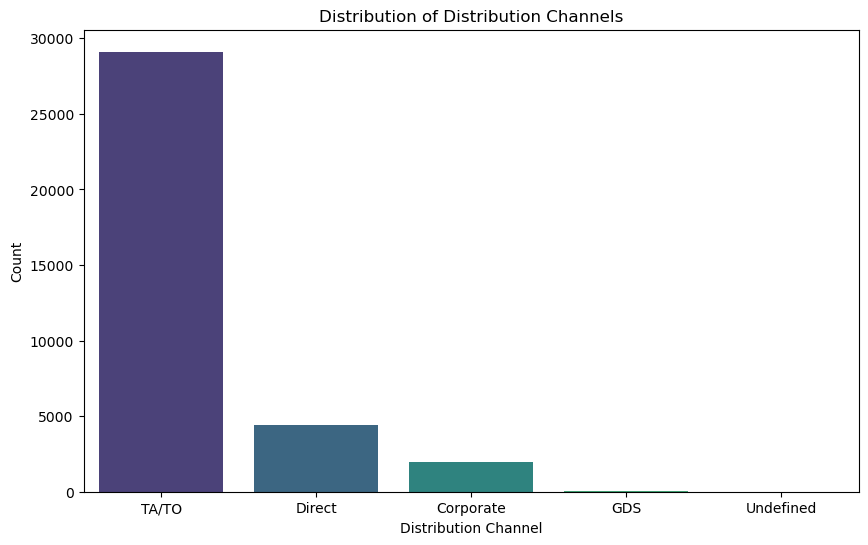

In [ ]:
# Visualisasi untuk kolom 'distribution_channel'
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=df, palette='viridis')
plt.title('Distribution of Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.show()

**Saluran Distribusi** (distribution_channel) atau cara bagaimana reservasi atau penjualan dilakukan **terbanyak** adalah menggunakan **TA/TO** (Travel Agents/ Tour Operators). Reservasi ini dilakukan melalui agen perjalanan atau operator tur.

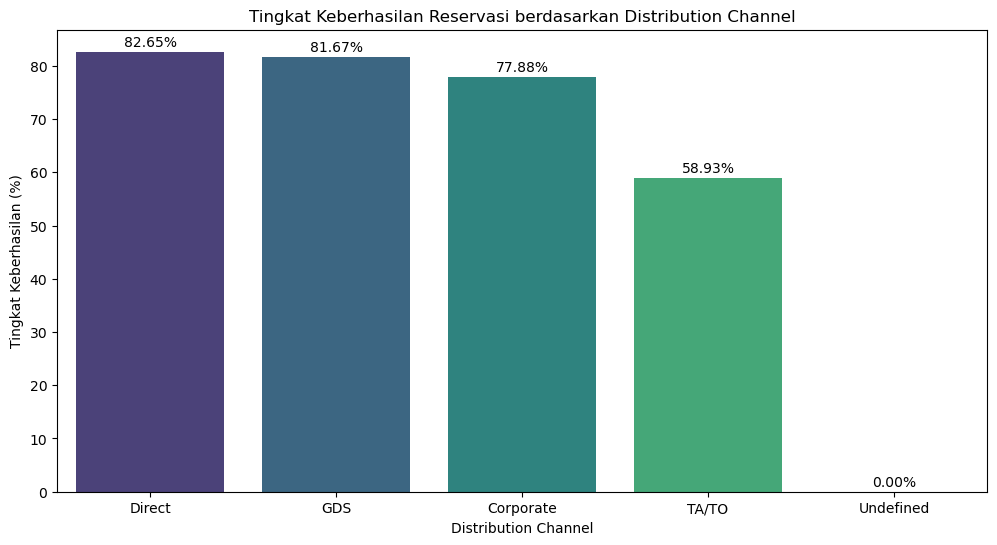

In [ ]:
# Menghitung tingkat keberhasilan reservasi
success_rates = df.groupby('distribution_channel')['reservation_status'].apply(lambda x: (x == 'Check-Out').mean() * 100).sort_values(ascending=False)

# Visualisasi data dengan label
plt.figure(figsize=(12, 6))
sns.barplot(x=success_rates.index, y=success_rates.values, palette='viridis')
plt.title('Tingkat Keberhasilan Reservasi berdasarkan Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Tingkat Keberhasilan (%)')

# Menambahkan label pada bar
for i, value in enumerate(success_rates):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

Namun, secara Tingkat keberhasilan pelanggan yang Check-Out, Reservasi secara **Direct** lah yang memiliki **tingkat keberhasilan tertinggi**, yaitu **82.65%**.

## Berapa Persentase Pelanggan yang termasuk *Repeated Guest*

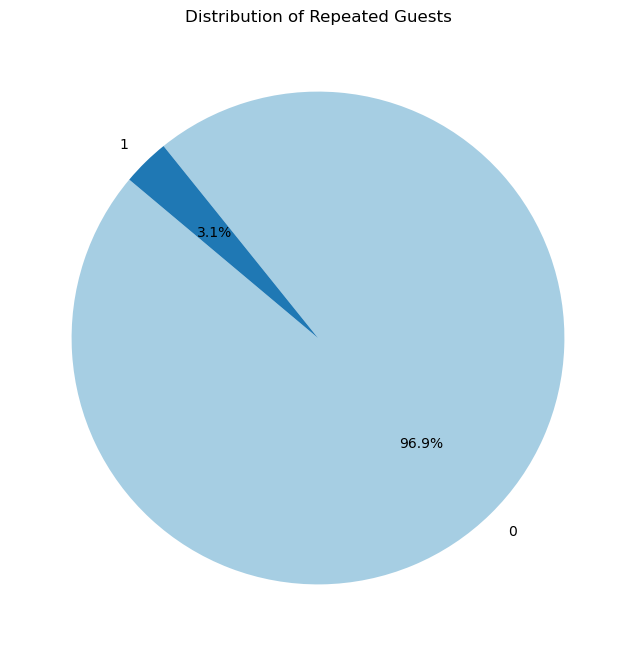

In [ ]:
# Visualisasi untuk kolom 'is_repeated_guest' (pie chart)
plt.figure(figsize=(8, 8))
repeated_guest_counts = df['is_repeated_guest'].value_counts()
plt.pie(repeated_guest_counts, labels=repeated_guest_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Repeated Guests')
plt.show()

Berdasarkan hasil analisis, hanya **3.1%** yang merupakan **Repeated Guest**

# Feature Engineering

In [ ]:
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,126.00,0,1,Canceled,2019-01-02,83297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35693,"Waves, Barbados Barbados",59,2018,March,14,28,1,3,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,85.85,0,1,Check-Out,2018-04-01,118986
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0,0,SC,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,126.00,0,2,Canceled,2019-04-19,118987
35695,"Orlando Airport Courtyard Orlando, FL",114,2018,July,27,1,1,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,192,0,Transient,75.00,0,0,Canceled,2018-03-29,118988
35696,"Leipzig Marriott Hotel Leipzig, Germany",0,2018,February,7,8,1,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,14,0,Transient,65.00,0,0,Check-Out,2018-02-09,118989


## Total Guests

Fitur baru yang menunjukkan total jumlah tamu (adults + children + babies).

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79,0,Transient,89.38,0,0,Canceled,2019-05-31,83293,2
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294,1
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295,2
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296,2
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,126.00,0,1,Canceled,2019-01-02,83297,2


In [ ]:
df.total_guests.value_counts()

2     24576
1      6525
3      3161
4      1202
0        51
5        39
20        1
27        1
Name: total_guests, dtype: int64

## Stay Duration

Hitung durasi tinggal tamu dengan menjumlahkan **stays_in_weekend_nights** dan **stays_in_week_nights**.

In [ ]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

## Room Type Match

fitur yang menunjukkan apakah tipe kamar yang dipesan sesuai dengan tipe kamar yang sebenarnya diberikan (1 jika sesuai, 0 jika tidak sesuai).

In [ ]:
df['room_type_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

In [ ]:
df['room_type_match'].value_counts()

1    31160
0     4396
Name: room_type_match, dtype: int64

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79,0,Transient,89.38,0,0,Canceled,2019-05-31,83293,2,1,1
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294,1,3,0
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295,2,1,1
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296,2,1,0
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,126.00,0,1,Canceled,2019-01-02,83297,2,3,1


## Categorical Encoding

Mengonversi variabel-variabel kategorikal ke numerical representations.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_columns = ['hotel', 'arrival_date_month',
                       'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type',
                       'customer_type']

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
0,16,46,2019,5,27,3,1,0,2,0,0,3,111,6,3,0,0,0,0,0,0,0,79,0,2,89.38,0,0,Canceled,2019-05-31,83293,2,1,1
1,43,98,2017,9,48,23,1,2,1,0,0,0,48,4,3,0,0,0,0,3,0,0,37,0,3,70.00,0,0,Check-Out,2017-11-26,83294,1,3,0
2,41,171,2019,5,30,28,0,1,2,0,0,0,50,5,3,0,0,0,0,0,1,0,168,0,2,80.10,0,0,Check-Out,2019-07-29,83295,2,1,1
3,12,2,2018,4,1,2,0,1,2,0,0,0,111,6,3,0,0,0,4,5,0,0,240,0,2,66.00,0,1,Check-Out,2018-01-03,83296,2,1,0
4,26,167,2019,8,20,14,2,1,2,0,0,0,48,6,3,0,0,0,0,0,0,0,9,0,2,126.00,0,1,Canceled,2019-01-02,83297,2,3,1


# Deep Analytics & Exploratory Data Analysis (EDA) (2)

Tujuan: Memperoleh pemahaman umum tentang data dan Menyelesaikan masalah spesifik dengan mengekstraksi *insights* dari dataset besar

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
0,16,46,2019,5,27,3,1,0,2,0,0,3,111,6,3,0,0,0,0,0,0,0,79,0,2,89.38,0,0,Canceled,2019-05-31,83293,2,1,1
1,43,98,2017,9,48,23,1,2,1,0,0,0,48,4,3,0,0,0,0,3,0,0,37,0,3,70.00,0,0,Check-Out,2017-11-26,83294,1,3,0
2,41,171,2019,5,30,28,0,1,2,0,0,0,50,5,3,0,0,0,0,0,1,0,168,0,2,80.10,0,0,Check-Out,2019-07-29,83295,2,1,1
3,12,2,2018,4,1,2,0,1,2,0,0,0,111,6,3,0,0,0,4,5,0,0,240,0,2,66.00,0,1,Check-Out,2018-01-03,83296,2,1,0
4,26,167,2019,8,20,14,2,1,2,0,0,0,48,6,3,0,0,0,0,0,0,0,9,0,2,126.00,0,1,Canceled,2019-01-02,83297,2,3,1


## Sebaran Harga Kamar (adr) berdasarkan tipe reservasi

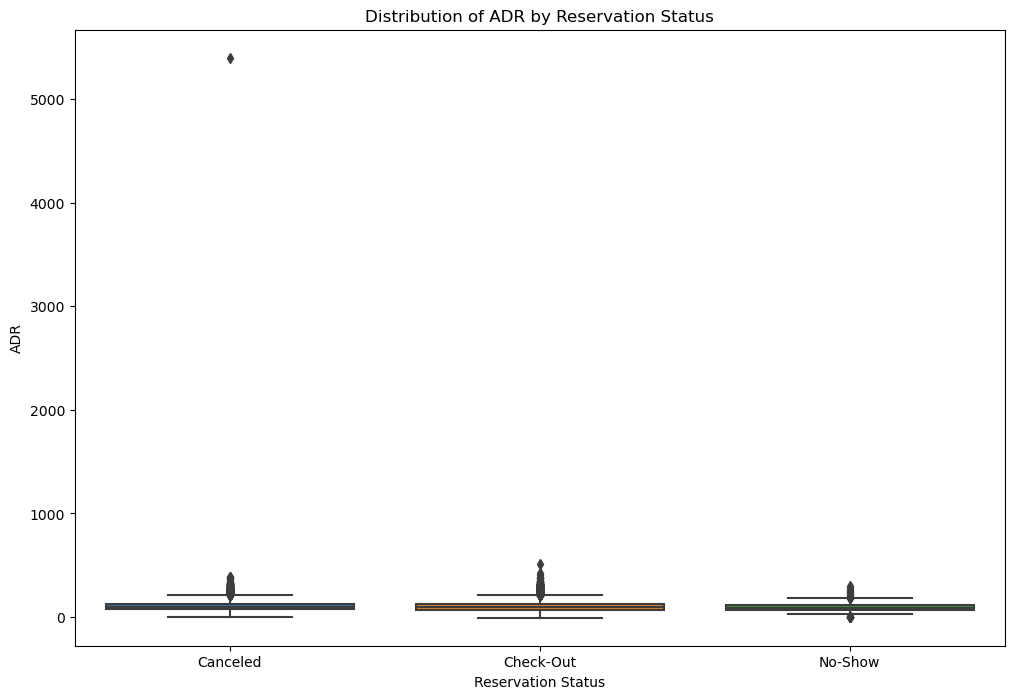

In [ ]:
# Sebaran harga kamar (adr) berdasarkan tipe reservasi
plt.figure(figsize=(12, 8))
sns.boxplot(x='reservation_status', y='adr', data=df)
plt.title('Distribution of ADR by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('ADR')
plt.show()

Jika diperhatikan terdapat outlier pada kolom reservation_status. Akan dilakukan analisis

In [ ]:
# parameter statistik
df['adr'].describe()

count    35556.000000
mean       102.627124
std         55.889626
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max       5400.000000
Name: adr, dtype: float64

Parameter statistik pada kolom ADR (Average Daily Rate) menunjukkan beberapa keanehan yang perlu diperhatikan, terutama nilai minimum yang negatif dan nilai maksimum yang sangat tinggi (5400).

**ADR (Average Daily Rate)** adalah rata-rata biaya harian yang dikeluarkan untuk menginap di hotel atau akomodasi lainnya.

ADR dihitung dengan membagi total pendapatan hotel dengan jumlah malam yang menginap.

In [ ]:
# Identifikasi nilai negatif
df[df['adr']<0]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
12101,61,195,2019,7,10,5,4,6,2,0,0,0,50,4,1,1,0,2,0,7,2,0,273,0,3,-6.38,0,0,Check-Out,2019-03-15,95394,2,10,0


In [ ]:
# Identifikasi nilai nol
df[df['adr']==0]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
74,30,183,2018,0,16,16,2,2,2,0,0,3,38,4,3,0,0,0,0,8,2,0,298,0,3,0.0,0,0,Check-Out,2018-04-20,83367,2,4,0
248,52,1,2017,1,33,12,0,2,1,0,0,0,111,1,3,1,0,1,0,0,0,0,14,0,2,0.0,0,1,Check-Out,2017-08-14,83541,1,2,1
253,40,7,2018,9,46,10,0,2,2,0,0,0,111,1,1,0,0,0,0,0,0,0,14,0,2,0.0,0,0,Check-Out,2018-11-12,83546,2,2,1
315,39,0,2018,10,42,12,0,0,2,0,0,0,48,6,1,1,0,0,0,8,0,0,240,0,2,0.0,0,1,Check-Out,2018-10-12,83608,2,0,0
319,8,46,2017,5,31,31,0,0,2,0,0,2,111,6,3,0,0,0,4,8,0,0,240,0,2,0.0,1,0,Check-Out,2017-07-31,83612,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35311,1,140,2017,2,50,10,0,0,2,0,0,2,111,6,3,0,0,0,5,8,0,0,241,0,2,0.0,0,1,Check-Out,2017-12-10,118604,2,0,0
35326,53,41,2019,4,3,17,0,0,1,0,0,4,111,4,1,0,0,0,0,0,1,0,14,0,3,0.0,0,0,Check-Out,2019-01-17,118619,1,0,1
35458,60,153,2017,10,42,16,0,0,2,0,0,0,111,6,3,0,0,0,3,3,1,0,240,0,3,0.0,0,3,Check-Out,2017-10-16,118751,2,0,1
35460,31,0,2018,3,6,3,0,1,1,0,0,0,111,5,3,0,0,0,3,3,0,0,28,0,2,0.0,0,0,Check-Out,2018-02-04,118753,1,1,1


Nilai ADR mungkin bernilai nol atau negatif.

ADR nol terjadi jika total pendapatan hotel sama dengan nol. Hal ini dapat terjadi jika hotel tidak ada tamu yang menginap atau jika hotel mengalami kerugian.

ADR negatif terjadi jika total pendapatan hotel lebih rendah dari jumlah malam yang menginap. Hal ini dapat terjadi jika hotel memberikan diskon yang besar atau jika hotel mengalami bencana alam atau kejadian lainnya yang menyebabkan hotel harus ditutup.

In [ ]:
# Identifikasi nilai > 5000
df[df['adr']>5000]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,total_guests,stay_duration,room_type_match
21611,59,35,2018,7,13,25,0,1,2,0,0,0,111,5,3,0,0,0,0,0,1,1,12,0,2,5400.0,0,0,Canceled,2018-02-19,104904,2,1,1


Nilai **ADR 5400 tidaklah masuk akal**, karena berdasarkan statista.com (https://www.statista.com/statistics/206840/average-daily-rate-of-hotels-by-region/) ADR sepanjang 2018 s/d 2020 tidak pernah melebihi 170.

Jadi **diasumsikan** 5400 adalah salah input data, nilai seharusnya adalah **540**

In [ ]:
# ganti nilai adr yang salah
df.loc[21611, "adr"] = 540

## Berapa banyak pelanggan yang tidak mendapatkan tipe kamar yang sesuai?

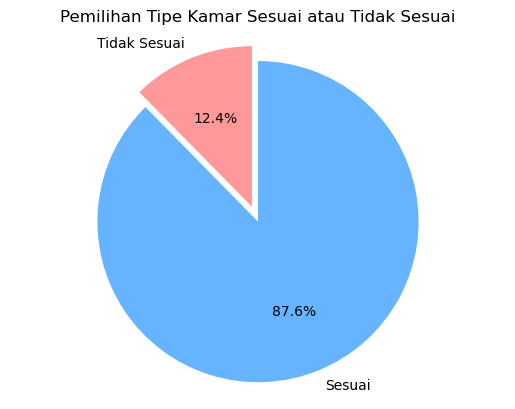

In [ ]:
# Menghitung jumlah pelanggan yang tidak mendapatkan tipe kamar yang sesuai
not_matching_rooms = (df['room_type_match'] == 0).sum()

# Menghitung jumlah pelanggan yang mendapatkan tipe kamar yang sesuai
matching_rooms = (df['room_type_match'] == 1).sum()

# Membuat visualisasi pie chart
labels = ['Tidak Sesuai', 'Sesuai']
sizes = [not_matching_rooms, matching_rooms]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pemilihan Tipe Kamar Sesuai atau Tidak Sesuai')

# Menampilkan pie chart
plt.show()

Berdasarkan Analisis yang dilakukan, ada sebanyak **12.4%** dari keseluruhan customer **tidak mendapat kamar yang sesuai**.

## RFM Analysis

**RFM Analysis** (Recency, Frequency, Monetary) adalah metode analisis pelanggan yang digunakan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. Analisis ini memeriksa tiga dimensi kunci:

1. **Recency** (R): Seberapa baru pelanggan melakukan pembelian.
2. **Frequency** (F): Seberapa sering pelanggan melakukan pembelian.
3. **Monetary** (M): Seberapa banyak uang yang dihabiskan pelanggan.

Dalam kasus ini, kita akan memanfaatkan kolom 'reservation_status_date' untuk menilai recency, frekuensi dapat diukur berdasarkan jumlah reservasi, dan monetary dapat diwakili oleh 'adr' (Average Daily Rate).

In [ ]:
# Menghitung recency, frequency, dan monetary
current_date = df['reservation_status_date'].max()
rfm_data = df.groupby('customer_type').agg({
    'reservation_status_date': lambda x: (current_date - x.max()).days,
    'bookingID': 'count',
    'adr': 'sum'
}).rename(columns={
    'reservation_status_date': 'recency',
    'bookingID': 'frequency',
    'adr': 'monetary'
}).reset_index()

# Menampilkan hasil RFM Analysis
print(rfm_data)

   customer_type  recency  frequency    monetary
0              0        0       1283   113704.55
1              1        7        158    13702.32
2              2        0      26778  2883100.51
3              3        4       7337   633642.64



Berdasarkan hasil output RFM Analysis, dapat disimpulkan beberapa hal:

1. Recency (R):
- Pelanggan tipe 'Contract' dan 'Transient' memiliki nilai recency yang sangat rendah (0), menunjukkan bahwa mereka baru-baru ini melakukan reservasi atau pembelian.
- Pelanggan tipe 'Group' memiliki nilai recency yang sedang (7), menunjukkan bahwa mereka juga cukup baru-baru ini melakukan reservasi.
- Pelanggan tipe 'Transient-Party' memiliki nilai recency yang sedang (4), menunjukkan bahwa mereka juga relatif baru-baru ini melakukan reservasi.

2. Frequency (F):
- Pelanggan tipe 'Transient' memiliki frekuensi yang jauh lebih tinggi dibandingkan dengan tipe pelanggan lainnya, dengan nilai 26.778 reservasi.
- Pelanggan tipe 'Contract' juga memiliki frekuensi yang tinggi dengan 1.283 reservasi.
- Pelanggan tipe 'Transient-Party' memiliki frekuensi 7.337 reservasi.
- Pelanggan tipe 'Group' memiliki frekuensi yang lebih rendah dibandingkan dengan tipe pelanggan lainnya, dengan nilai 158 reservasi.

3. Monetary (M):
- Pelanggan tipe 'Transient' memiliki nilai monetary yang sangat tinggi, menunjukkan bahwa mereka menyumbang jumlah uang yang signifikan melalui reservasi mereka.
- Pelanggan tipe 'Contract' juga memiliki nilai monetary yang tinggi, menunjukkan bahwa meskipun frekuensinya tinggi, nilai total pengeluaran mereka juga signifikan.
- Pelanggan tipe 'Transient-Party' dan 'Group' memiliki nilai monetary yang lebih rendah dibandingkan dengan tipe pelanggan lainnya.
- Secara keseluruhan, tipe pelanggan 'Transient' dan 'Contract' mungkin merupakan segmen pelanggan yang sangat berharga karena kombinasi nilai recency, frequency, dan monetary yang tinggi. Di sisi lain, tipe pelanggan 'Group' mungkin merupakan segmen yang lebih kecil dan kurang sering melakukan reservasi, tetapi dapat tetap menjadi target penting.

# Machine Learning Model

## Feature Selection

In [ ]:
# Pilih kolom yang akan digunakan sebagai fitur
features = ['lead_time', 'arrival_date_year',
            'stays_in_weekend_nights', 'stays_in_week_nights',
            'adults', 'children', 'babies',
            'is_repeated_guest', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes',
            'adr', 'required_car_parking_spaces',
            'total_of_special_requests', 'room_type_match']

# Pilih kolom target
target = 'reservation_status'

# Buat dataframe fitur
X = df[features]

# Buat dataframe target
y = df[target]

## Split Data menjadi Train dan Test

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Bangun Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

## Accuracy

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Prediksi pada data test
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.812429696287964


## F1 score

In [ ]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
f1_score_value = f1_score(y_test, y_pred, average='micro')

print(f'F1 Score: {f1_score_value}')

F1 Score: 0.8124296962879639


## False Negative

In [ ]:
# Menghitung False Negative Rate
conf_matrix = confusion_matrix(y_test, y_pred)

false_negative_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])

print("False Negative Rate:", false_negative_rate)

False Negative Rate: 0.10514440433212996


## Classification Report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    Canceled       0.79      0.69      0.74      2606
   Check-Out       0.82      0.89      0.86      4440
     No-Show       0.33      0.08      0.12        66

    accuracy                           0.81      7112
   macro avg       0.65      0.55      0.57      7112
weighted avg       0.81      0.81      0.81      7112



- Tingkat akurasi sebesar 0.8124 berarti sekitar 81.24% dari prediksi yang dilakukan oleh model adalah benar. Dalam konteks ini, tingkat akurasi yang tinggi menunjukkan bahwa model secara keseluruhan cukup baik dalam membuat prediksi yang benar.

- F1 Score sebesar 0.8124 adalah ukuran yang mencakup baik presisi maupun recall. Nilai F1 yang tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara kemampuan untuk mengidentifikasi kelas positif dan menghindari kesalahan prediksi.

- False Negative Rate sebesar 0.1051 (atau 10.51%) adalah tingkat kesalahan di mana model memprediksi bahwa suatu instansi adalah negatif, padahal seharusnya instansi tersebut adalah positif. Tingkat yang lebih rendah pada False Negative Rate biasanya diinginkan, karena mengindikasikan bahwa model lebih jarang melewatkan kasus positif.

Secara keseluruhan, model Anda memiliki tingkat akurasi yang baik dan seimbang antara presisi dan recall. Namun, untuk meningkatkan performa model, dapat diarahkan untuk mengurangi jumlah False Negatives, tergantung pada kebutuhan khusus aplikasi Anda.

# Rekomendasi Bisnis

Berdasarkan analisis dan model machine learning yang telah dikembangkan, beberapa solusi dan inovasi yang dapat direkomendasikan kepada perusahaan reservasi penginapan adalah sebagai berikut:

1. **Fokus Pemasaran di Bulan Agustus**:
Optimalkan promosi dan penawaran khusus pada bulan Agustus, bulan dengan jumlah reservasi tertinggi.

2. **Perkuat Pelanggan Tipe Transient**:
Tingkatkan strategi pemasaran untuk menarik dan mempertahankan pelanggan tipe Transient, yang paling sering melakukan reservasi.

3. **Fleksibilitas Kebijakan Deposit**:
Pertimbangkan kebijakan deposit yang lebih fleksibel atau model tanpa deposit untuk meningkatkan tingkat keberhasilan reservasi.

4. **Targetkan Pasar Negara Utama**:
Fokuskan pemasaran tambahan pada negara-negara dengan tingkat keberhasilan reservasi tertinggi.

5. **Optimalkan Channel Distribusi**:
Pertahankan hubungan dengan Travel Agents/Tour Operators dan pantau kinerja saluran distribusi untuk hasil terbaik.

6. **Promosikan Meal Plan BB**:
Tingkatkan promosi untuk meal plan Bed & Breakfast yang menjadi favorit pelanggan.

7. **Peningkatan Layanan Repeated Guest**:
Fokus pada peningkatan layanan untuk meningkatkan retensi pelanggan Repeated Guest.

8. **Analisis RFM untuk Targeted Marketing**:
Manfaatkan analisis RFM untuk pemasaran yang lebih terarah, terutama pada pelanggan tipe 'Transient' dan 'Contract'.

9. **Analisis Cancellation untuk Market Segment Groups**:
Selidiki penyebab pembatalan reservasi di market segment Groups dan atasi masalah yang mungkin muncul.

10. **Peningkatan Ketersediaan Kamar Sesuai Permintaan**:
Tingkatkan ketersediaan kamar sesuai permintaan pelanggan untuk mengurangi persentase pelanggan yang tidak mendapatkan tipe kamar yang diinginkan.